In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la

# Problem 1

Begin with the equation 
\begin{equation}
(A^TN^{-1}A)m = A^TN^{-1}x.
\end{equation}
Next, letting $A = QR$, where $Q$ is orthogonal, rectangular and $R$ is a triangular matrix, the above becomes
\begin{equation}
(QR)^TN^{-1}QR)m = (QR)^TN^{-1}x\\
(R^TQ^TN^{-1}QR)m = R^TQ^TN^{-1}x.
\end{equation}
Taking the inverse of the left hand side, we get that 
\begin{equation}
\boxed{m = (R^TQ^TN^{-1}QR)^{-1}R^TQ^TN^{-1}x}
\end{equation}

In the noiseless case, e.g. $N = I$, the above simplifies further:
\begin{align*}
m &= (R^TQ^TQR)^{-1}R^TQ^Tx\\
&= R^{-1}R^{-T}R^TQ^Tx\\
&=\boxed{R^{-1}Q^Tx}.
\end{align*}

### Comparison of classical vs QR

NB: In the below code, I assume that $N = I$ and use the reduced form of the equations for simplicity. 

In [2]:
# Create some data to fit polynomials to
def _func(x):
    return np.cos(x) + np.sin(x)

def get_fits(order, x):
    
    
    # Generate y vals
    y = _func(x)
    
    n = len(x)

    # Construct A matrix, fitting polynomials up to order specified
    A = np.zeros([n, order+1])
    for i in range(order+1):
        A[:,i] = x**i

    # Classical method
    lhs = A.T@A
    rhs = A.T@y
    m_classical = np.linalg.inv(lhs)@rhs
    y_fit_classical = A@m_classical

    # QR factorization
    q, r = np.linalg.qr(A)
    m_qr = np.linalg.inv(r)@q.T@y
    y_fit_qr = A@m_qr
    
    return y_fit_classical, y_fit_qr


#### Low order

For our first test, we'll set the order of the polynomial to something small, so we expect both the classical method and QR to work. 

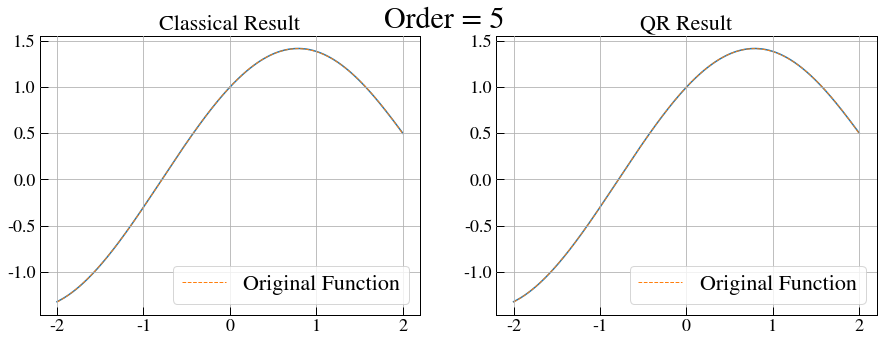

In [3]:
order = 5
x = np.linspace(-2,2,1000)
y = _func(x)
y_fit_classical, y_fit_qr = get_fits(order, x)

fig, axs = plt.subplots(1,2,figsize=(15,5))
fig.suptitle('Order = {0}'.format(order), fontsize=30)
axs[0].plot(x, y_fit_classical,)
axs[1].plot(x, y_fit_qr)
axs[0].plot(x, y, label = 'Original Function', ls='--', linewidth=1)
axs[1].plot(x, y, label = 'Original Function', ls='--', linewidth=1)
axs[0].grid()
axs[1].grid()
axs[0].legend()
axs[1].legend()
axs[0].set_title('Classical Result')
axs[1].set_title('QR Result')
plt.show()

As we can see, both are behaving well. 

#### High order

Let's now crank the order of the polynomial to see how they behave. 

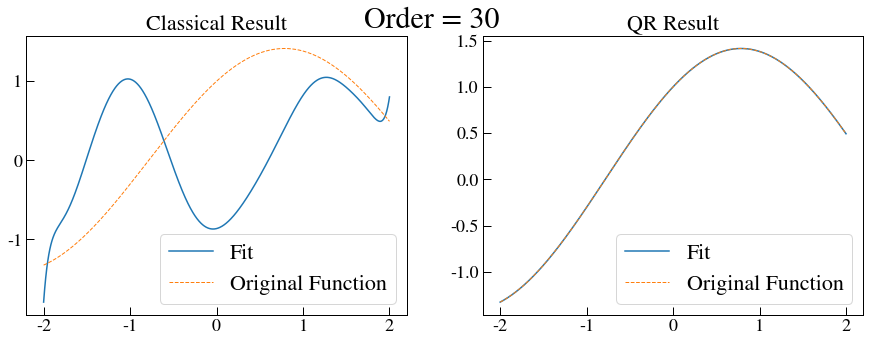

In [4]:
order = 30
y_fit_classical, y_fit_qr = get_fits(order, x)

fig, axs = plt.subplots(1,2,figsize=(15,5))
fig.suptitle('Order = {0}'.format(order), fontsize=30)
axs[0].plot(x, y_fit_classical, label = 'Fit')
axs[1].plot(x, y_fit_qr, label = 'Fit')
axs[0].plot(x, y, label = 'Original Function', ls='--', linewidth=1)
axs[1].plot(x, y, label = 'Original Function', ls='--', linewidth=1)
axs[0].legend()
axs[1].legend()
axs[0].set_title('Classical Result')
axs[1].set_title('QR Result')
plt.show()

We can see that QR is now performing much better than the classical result, even at higher orders!

# Problem 2

## Part A

In [5]:
def fit_chebyshev(x, y, order, return_coeff=False):
    
    # generate A matrix
    A = np.polynomial.chebyshev.chebvander(x, order)
    
    lhs = A.T@A
    rhs = A.T@y
    
    m = np.linalg.inv(lhs)@rhs
    y_fit = A@m
    
    if return_coeff:
        return y_fit, m
    
    return y_fit

### Low Order

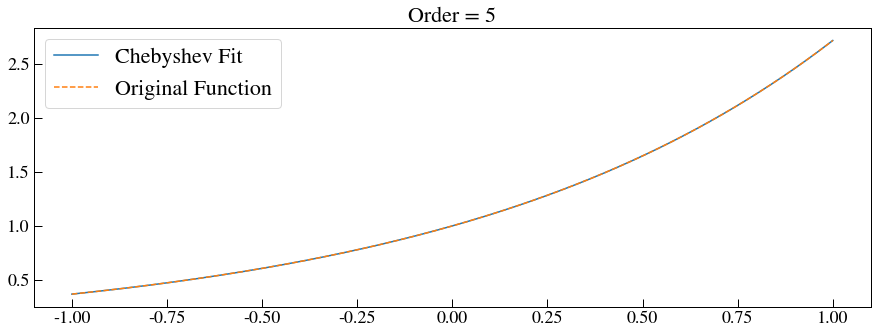

In [6]:
x = np.linspace(-1, 1, 1000)
y = np.exp(x)

order = 5
y_fit = fit_chebyshev(x, y, order)

plt.figure(figsize=(15,5))
plt.plot(x, y, label = 'Chebyshev Fit')
plt.plot(x, y, label = 'Original Function', ls='--')
plt.title('Order = {0}'.format(order))
plt.legend()
plt.show()

### High order

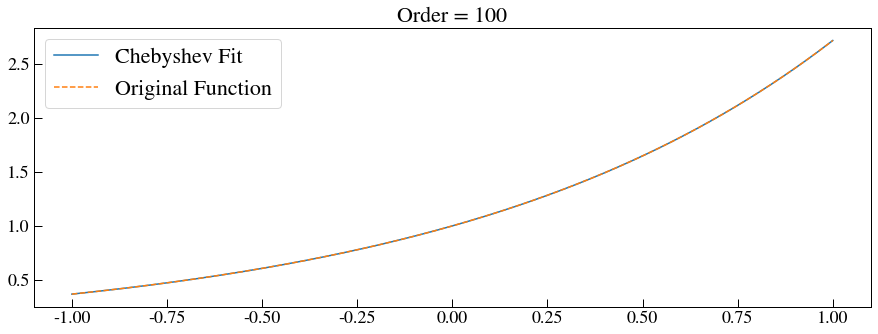

In [7]:
x = np.linspace(-1, 1, 1000)
y = np.exp(x)

order = 100
y_fit = fit_chebyshev(x, y, order)

plt.figure(figsize=(15,5))
plt.plot(x, y, label = 'Chebyshev Fit')
plt.plot(x, y, label = 'Original Function', ls='--')
plt.title('Order = {0}'.format(order))
plt.legend()
plt.show()

As we can see, even after cranking the order, the fit is still stable. 

## Part B

The answer to determining the max error is given by this sentence: $\textit{If we truncate a polynomial fit, the maximum error is bounded by the sum of the absolute value of the coefficients we truncated.}$

#### Fitting a 6th order Chebyshev to exp(x)

In [8]:
yfit, coeff = fit_chebyshev(x, y, order = 6, return_coeff = True)

rms = np.sqrt(np.mean((y-yfit)**2))
max_err = np.max(np.abs(y - yfit)) 
print('RMS error:', rms)
print('Maximum error:', max_err)

RMS error: 1.9852969888239004e-06
Maximum error: 7.984807813610217e-06


#### Fitting 100 order Chebyshev to exp(x)

In [9]:
yfit, coeff = fit_chebyshev(x, y, order=100, return_coeff = True)

truncated_coeff = coeff[0:7]

yfit_truncated = np.polynomial.chebyshev.chebval(x, truncated_coeff)

rms_truncated = np.sqrt(np.mean((y-yfit_truncated)**2))
max_err_truncated = np.max(np.abs(y - yfit_truncated))
max_err_pred = np.sum(np.abs(coeff[7:]))

print('RMS error:', rms_truncated)
print('Maximum error:', max_err_truncated)
print('Maximum error predicted:', max_err_pred)

RMS error: 2.2588113153375366e-06
Maximum error: 3.4092623675263667e-06
Maximum error predicted: 3.4092624259119547e-06


In [10]:
print('RMS error has increased by approximately {0} %'. format((rms_truncated - rms)/rms * 100))
print('Max error has decreased by approximately {0}%'.format(np.abs(max_err_truncated - max_err)/max_err*100))

RMS error has increased by approximately 13.776998003491025 %
Max error has decreased by approximately 57.303138070333624%


As we can see, the predicted maximum error is roughly the same as the obtained maximum error, and the RMS error has increased by ~14%, while the maximum error has decreased by ~57% (or more than a factor of 2). 

# Problem 3

Theory (e.g. Jon's notes) predicts that
\begin{equation}
\tilde{d} = \Lambda^{-1/2}V^Td,
\end{equation} 
where $A = U\Lambda V^T$. However, in `numpy` world, if $d$ is uncorrelated and $\tilde{d}$ is correlated, then 
\begin{equation}
\boxed{\tilde{d} = V^T\Lambda^{1/2}d}.
\end{equation} 

In [11]:
def generate_correlated_noise_svd(N, nsim = 10000):
    
    ndim = N.shape[0]
    
    # Perform SVD 
    u, s, v = np.linalg.svd(N, 1)
    Λ_12 = np.zeros(shape=(ndim,ndim), dtype=np.float64)
    np.fill_diagonal(Λ_12, np.sqrt(s))
    
    # Generate many samples of Gaussian distributed points
    d = np.random.randn(ndim, nsim)
    
    if nsim==1:
        return v.T@Λ_12@d[:,0]

    # Generate random correlated data
    data = np.zeros((ndim,ndim,d.shape[-1]))
    
    for i in range(nsim):
        d_new = v.T@Λ_12@d[:,i]
        data[:,:,i] = np.outer(d_new, d_new)
    
    return data
    

In [12]:
# Define N as Jon suggested 
ndim = 5
N = np.ones(shape=(ndim,ndim), dtype=np.float64)
np.fill_diagonal(N, N.diagonal() + 1)

# Get simulated correlated noise matrices
data = generate_correlated_noise_svd(N, nsim=1000000)
N_new = np.mean(data, axis = -1)
print(N_new)

[[2.0056714  1.00241969 1.00624402 1.0029803  1.0005693 ]
 [1.00241969 2.00227032 1.00225322 1.00109605 0.99995045]
 [1.00624402 1.00225322 2.00730585 1.00323878 1.00462152]
 [1.0029803  1.00109605 1.00323878 2.00441939 1.00284165]
 [1.0005693  0.99995045 1.00462152 1.00284165 1.99800365]]


As we can see, $\langle dd^T\rangle$ indeed averages out to our noise matrix as we would expect over many iterations (1,000,000 in this case).

# Problem 4

## Part A

In [13]:
x = np.arange(0,1000)
a = np.array([0.1,0.5,0.9])
sigma = np.array([5,50,500])

sig_src=50

# Source centered at the centre of our grid
A = np.exp(-(x - x[len(x)//2])**2/(2*sig_src**2))

XX, YY = np.meshgrid(x, x)

# Initialize array to save errors 
m_err_arr = np.empty(shape=(len(a), len(sigma)), dtype=np.float64)

# Fit each data 
for i in range(3):
    for j in range(3):
        
        _a = a[i]
        _sig = sigma[j]
        _N = _a * np.exp(-(XX - YY)**2 / (2*_sig**2)) + (1 - _a)*np.eye(len(x))
        _Ninv = np.linalg.inv(_N)
                        
        # Signal is just our model with amplitude 1, which is just our model
        signal = A

        _lhs = A[:,np.newaxis].T@_Ninv@A
        _rhs = A[:,np.newaxis].T@_Ninv@signal
                
        _lhs_inv = 1/_lhs
        
        _m = _lhs_inv*_rhs
        
        m_err_arr[i,j] = np.sqrt(_lhs_inv[0])


print('ERROR MATRIX:')
print(m_err_arr)

print('When sigma = 5, a = 0.5, error on m is:', round(m_err_arr[1,0],3), 'as Jon got.')

ERROR MATRIX:
[[0.15576335 0.3377449  0.12757499]
 [0.27599935 0.71405448 0.10066392]
 [0.35789526 0.94993195 0.04892549]]
When sigma = 5, a = 0.5, error on m is: 0.276 as Jon got.


## Part B

The $\textbf{worst}$ set of parameters with the largest error bars is when $(a, \sigma) = (0.9, 50)$. The $\textbf{best}$ set of parameters with the smallest errors bars is when $(a, \sigma) = (0.9, 500)$. This result is consistent with what we know about noise: when our signal is too similar to our noise model (e.g. amplitude of 1, standard deviation of 50), the solver doesn't know how to distinguish between our signal and the noise. However, when we give it a similar amplitude, but our noise has a $\textit{much different}$ standard deviation (e.g. 500), it can easily pick out what is the signal and what is the noise. As we can see from our error matrix, the fit did the worst when the standard deviation was too similar to that of our noise. Consequently, the noise we should be most worried about is one that has too similar of a width as our signal (e.g. $\sigma$).

NB: I played around with the realizations using the code I wrote for problem 3 and used it to determine my answer above, but omitted the plots for clarity. 